In [1]:
import pandas as pd
import numpy as np
import seaborn as sb

In [2]:
loan_data=pd.read_csv('bankloan.csv')

In [3]:
loan_data.head()

,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


<Axes: >

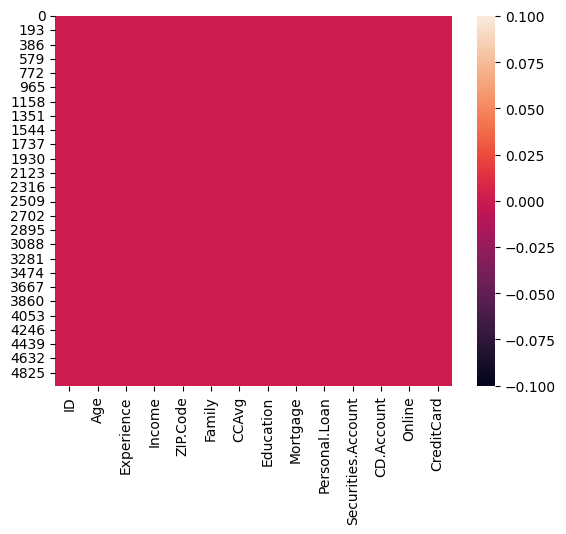

In [4]:
sb.heatmap(loan_data.isnull())

In [5]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP.Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal.Loan       5000 non-null   int64  
 10  Securities.Account  5000 non-null   int64  
 11  CD.Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [6]:
cols_to_drop=['ID','ZIP.Code']
loan_data=loan_data.drop(cols_to_drop,axis=1)

In [7]:
loan_data.head(10)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1
5,37,13,29,4,0.4,2,155,0,0,0,1,0
6,53,27,72,2,1.5,2,0,0,0,0,1,0
7,50,24,22,1,0.3,3,0,0,0,0,0,1
8,35,10,81,3,0.6,2,104,0,0,0,1,0
9,34,9,180,1,8.9,3,0,1,0,0,0,0


<Axes: >

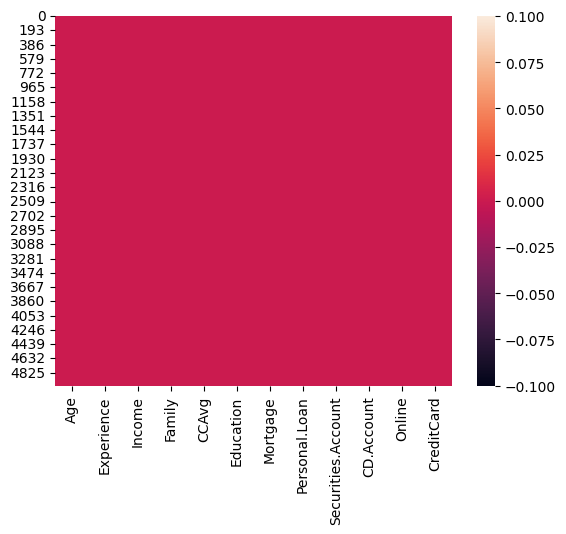

In [8]:
sb.heatmap(loan_data.isnull())

In [9]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   Family              5000 non-null   int64  
 4   CCAvg               5000 non-null   float64
 5   Education           5000 non-null   int64  
 6   Mortgage            5000 non-null   int64  
 7   Personal.Loan       5000 non-null   int64  
 8   Securities.Account  5000 non-null   int64  
 9   CD.Account          5000 non-null   int64  
 10  Online              5000 non-null   int64  
 11  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 468.9 KB


In [10]:
a=loan_data.drop('Personal.Loan',axis=1)

In [11]:
a.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities.Account,CD.Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,1,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1


In [12]:
b=loan_data['Personal.Loan']

In [13]:
b

0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Name: Personal.Loan, Length: 5000, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(a,b,test_size=0.3, random_state=0)

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [16]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=0)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

dt_accuracy = accuracy_score(y_test, dt_pred)
dt_precision = precision_score(y_test, dt_pred)
dt_recall = recall_score(y_test, dt_pred)
print("Decision Tree Results:")
print("Accuracy:", dt_accuracy)
print("Precision:", dt_precision)
print("Recall:", dt_recall)
print()

Decision Tree Results:
Accuracy: 0.98
Precision: 0.8888888888888888
Recall: 0.875



In [17]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
print("Random Forest Results:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print()

Random Forest Results:
Accuracy: 0.986
Precision: 0.9652173913043478
Recall: 0.8671875



In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

knn_accuracy = accuracy_score(y_test, knn_pred)
knn_precision = precision_score(y_test, knn_pred)
knn_recall = recall_score(y_test, knn_pred)
print("K-Nearest Neighbors Results:")
print("Accuracy:", knn_accuracy)
print("Precision:", knn_precision)
print("Recall:", knn_recall)
print()

K-Nearest Neighbors Results:
Accuracy: 0.916
Precision: 0.5113636363636364
Recall: 0.3515625

